#**CASE: BIKE SALES**

ZYX Company is a company that manufactures and sells bicycles. In recent months, the company's bicycle sales have declined. The company's sales team wants to do promotions to increase sales. In order to save costs, the promotions carried out are expected to be right on target. Therefore, the company's sales team wants to know the characteristics of the people who have the greatest opportunity to buy a bicycle so that the promotion can be carried out effectively.

**Your goal is to build a predictive model that answers the question “What people are more likely to buy a bike?”** using the dataset that has details of 1000 users from different backgrounds.

As data scientists, you are asked to analyze and transform as needed the data available and apply different models in order to answer in the most accurate way the defined question. Are you able to design a model that can predict the whether or not some people from different background buy a bike?

The following table describes the data used.


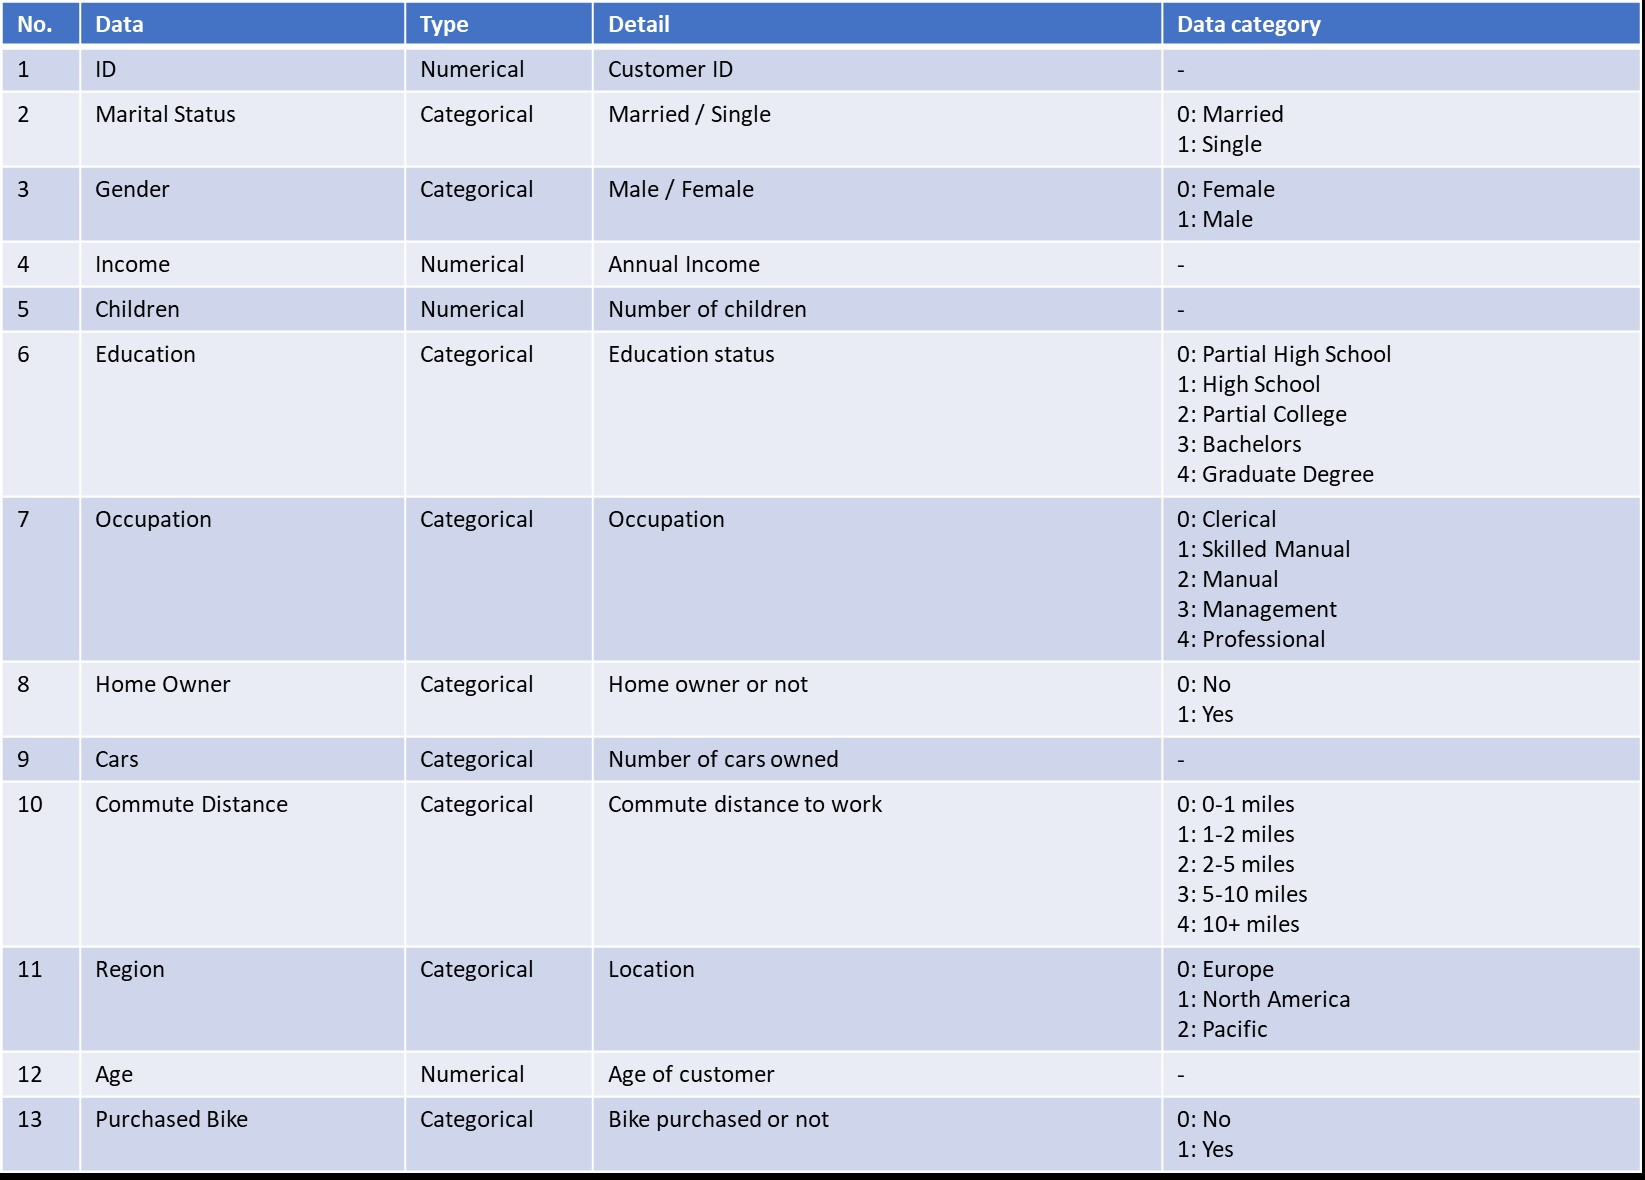

Please kindly submit the homework 2: Classification in python by filling the form below and uploading the ipynb file **before 5th August 2021 23:59 (GMT+7, Jakarta Time)**.

https://forms.gle/x1fYTL5kqZegW1mJA

File Name: Selection Number_Full Name.

##**Import Library and Load Data**

In [ ]:
!pip install -q dtreeviz

In [ ]:
# import python library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# retreive data from URL
import urllib.request

urllib.request.urlretrieve('https://raw.githubusercontent.com/bungakharissa/IVC_data/main/bike_buyers_coded.csv', 'bike_buyers.csv')

('bike_buyers.csv', <http.client.HTTPMessage at 0x7f198b5635d0>)

In [ ]:
# load bike_buyers file (this file uses "," as delimiter)
# name the dataframe as 'data'
data = pd.read_csv('bike_buyers.csv', delimiter=',')

# retrieve the first 5 records in data
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,0,0,40000,1,3,2,1,0,0,0,42,0
1,24107,0,1,30000,3,2,0,1,1,0,0,43,0
2,14177,0,1,80000,5,2,4,0,2,2,0,60,0
3,24381,1,1,70000,0,3,4,1,1,3,2,41,1
4,25597,1,1,30000,0,3,0,0,0,0,0,36,1


In [ ]:
data.columns

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')

##**Data Understanding**

In [ ]:
# check descriptive statistics for data
data.describe()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,19965.992000,0.461000,0.509000,56140.000000,1.908000,2.323000,2.252000,0.685000,1.452000,1.513000,0.89200,44.190000,0.481000
std,5347.333948,0.498726,0.500169,31081.609779,1.626094,1.175608,1.429174,0.464748,1.124705,1.426136,0.69341,11.353537,0.499889
min,11000.000000,0.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,25.000000,0.000000
25%,15290.750000,0.000000,0.000000,30000.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.00000,35.000000,0.000000
50%,19744.000000,0.000000,1.000000,60000.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.00000,43.000000,0.000000
75%,24470.750000,1.000000,1.000000,70000.000000,3.000000,3.000000,4.000000,1.000000,2.000000,3.000000,1.00000,52.000000,1.000000
max,29447.000000,1.000000,1.000000,170000.000000,5.000000,4.000000,4.000000,1.000000,4.000000,4.000000,2.00000,89.000000,1.000000


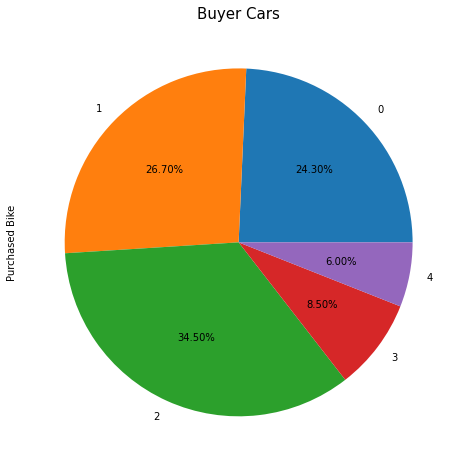

In [ ]:
# choose one categorical variable and create a pie chart
Buyer_cars = data.groupby('Cars')['Purchased Bike'].count()

plt.figure(figsize=(8,8))

plt.title('Buyer Cars', fontdict={'fontsize': 15})

Buyer_cars.plot.pie(y='Cars', autopct='%1.2f%%')

plt.show()

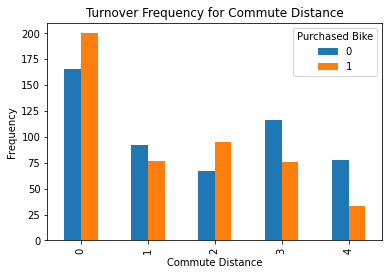

In [ ]:
# create a crosstab bar chart to see total people who buy and not buy a bike according to the their commute distance.
crosstab_cd = pd.crosstab(data['Commute Distance'], data['Purchased Bike'])
crosstab_cd

crosstab_cd.plot(kind='bar')
plt.title('Turnover Frequency for Commute Distance')
plt.xlabel('Commute Distance')
plt.ylabel('Frequency')

plt.show()

##**Data Preparation: Splitting Training and Validation Dataset**

In [ ]:
# split data to be a training set and validation set
from sklearn.model_selection import train_test_split 

# set dataframe of predictor variable (all variable except ID and Purchased Bike)
X = data.drop(['ID', 'Purchased Bike'], axis=1)

# set dataframe of target variable (in this case, we use 'Purchased Bike')
y = data['Purchased Bike']

# split dataset to be a training set and validation set with test size 30%
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=5)

In [ ]:
# check the length of training and validation dataset
print(len(X_train))
print(len(X_val))

700
300


##**Modeling**

In [ ]:
# import regression tree model
from sklearn.tree import DecisionTreeClassifier

# import library for illustrating decision tree
from sklearn import tree
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

In [ ]:
# create decision tree model with max_depth = 3
dt = DecisionTreeClassifier(max_depth=3, random_state=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

In [ ]:
# create a decision tree using dtreeviz with target_name = 'Purchased Bike'
viz = dtreeviz(dt,
               X_train.values,
               y_train.values,
               target_name='Purchased Bike',
               feature_names=X_train.columns
               )

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


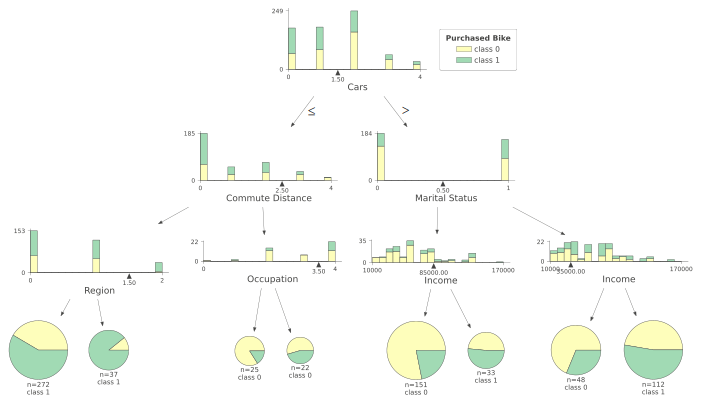

In [ ]:
# show the decision tree
viz

In [ ]:
# see the important variables that influence people to buy/not buy a bike
feature_importance = dt.feature_importances_
ind = list(X)

importance = pd.DataFrame(index=ind, data=feature_importance, columns=['importance'])
importance_sorted = importance.sort_values(by='importance', ascending=False)
importance_sorted

,importance
Cars,0.350989
Commute Distance,0.179906
Income,0.165428
Marital Status,0.131246
Region,0.129645
Occupation,0.042785
Gender,0.000000
Children,0.000000
Education,0.000000
Home Owner,0.000000


##**Validation**

In [ ]:
# check train model accuracy
dt.score(X_train, y_train)*100

64.57142857142857

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix

# create y_pred to make a prediction from X_val using generated decision tree model
y_pred = dt.predict(X_val)

# print confusion matrix
cm = confusion_matrix(y_val, y_pred)
print(cm)
print((cm[0][0]+cm[1][1])*100 / (cm[1][0]+cm[0][0]+cm[0][1]+cm[1][1]))

[[ 61  88]
 [ 35 116]]
59.0


In [ ]:
# recall_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print(recall_score(y_val, y_pred))
print(precision_score(y_val, y_pred))

0.7682119205298014
0.5686274509803921


## **Essay**

**write some insights found from this research**










1. Bike buyers are strongly influenced by buyers who have more cars, with an indicator of "importance" of 35%, while Travel Distance, Income, Marital Status, and Region are around 12.9-17.9% and Employment affects 4%, and other categories do not affect the purchase of a bicycle.
2. The evaluation value of the accuracy of the training model is 0.64 compared to the accuracy of the test/validation model with an evaluation value of 0.59, with a proportion of 30% as test data, it can be concluded that the model is correct. .
3. A recall value of 76% and a False Positive (FP) value of 24% were obtained, indicating that the 24% expectation (buying a bicycle) did not occur.
4. Obtained a precision value of 56% and a False Negative (FN) value of 44%, seen from the proportion that 44% of customers are predicted not to buy a bicycle, but to buy a bicycle. Bike buyers do not come from the seller's expectations.
5. Looking at the turnover of commute distance on bicycle purchases, especially people who buy bicycles if the distance to work is shorter.